<a href="https://colab.research.google.com/github/esramostafa20/Regression-Models-/blob/main/03_polynomial_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 3. Polynomial Regression
 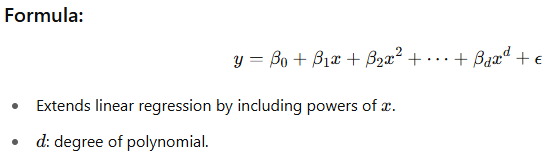

## When to use:

1. When the relationship between 𝑥 and y is non-linear but can be approximated by a polynomial.

2. Data has a curve trend.

## When not to use:
1. Very high-degree polynomials can overfit.

2. If relationship is not polynomial in nature or too complex

In [3]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv("/content/final_student_data.csv")  # Or use any built-in dataset
df.head()

,math score,reading score,writing score,total,gender_male,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,parental level of education_bachelor's degree,parental level of education_high school,parental level of education_master's degree,parental level of education_some college,parental level of education_some high school,lunch_standard,test preparation course_none
0,72,72,74,218,False,True,False,False,False,True,False,False,False,False,True,True
1,69,90,88,247,False,False,True,False,False,False,False,False,True,False,True,False
2,90,95,93,278,False,True,False,False,False,False,False,True,False,False,True,True
3,47,57,44,148,True,False,False,False,False,False,False,False,False,False,False,True
4,76,78,75,229,True,False,True,False,False,False,False,False,True,False,True,True


In [5]:
X = df.drop(columns=['math score', 'reading score', 'writing score', 'total'])  # or keep only relevant
y = df['total']

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)


In [8]:
model = LinearRegression()
model.fit(X_train_poly, y_train)

LinearRegression()

In [9]:
y_pred = model.predict(X_test_poly)


In [10]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R2 Score:", r2)

Mean Squared Error: 1909.1660841843207
R2 Score: 0.010435404140125004


## Mean Squared Error: 1909.17

This is the average of the squared differences between the predicted values and the actual values.

A lower MSE means your predictions are closer to the real values.

In our case:
MSE = 1909.17
This is quite high, considering that the math scores range from 0 to 100. This means our model is making large errors in prediction


## R2 Score: 0.0104

R² ranges from:

1. 1.0 → perfect prediction

2. 0.0 → model is as good as predicting the average

3. Negative → model is worse than predicting the average

R² = 0.01
This means:

our model only explains about 1% of the variation in the math scores.

In simple terms:

The model is not capturing the patterns well in the data.

It's only slightly better than a random guess (or just predicting the average math score for everyone).

## 🛠 What Can You Do?
Here are a few suggestions to improve it:

1. Try a lower or higher polynomial degree:

Degree 2 might not be enough.

But higher degrees can overfit, so test and compare.

2. Feature selection:

Are you including useful features?

Try selecting only reading score and writing score to predict math score.

3. Scale your data:

Polynomial regression is sensitive to feature scale. Use StandardScaler.

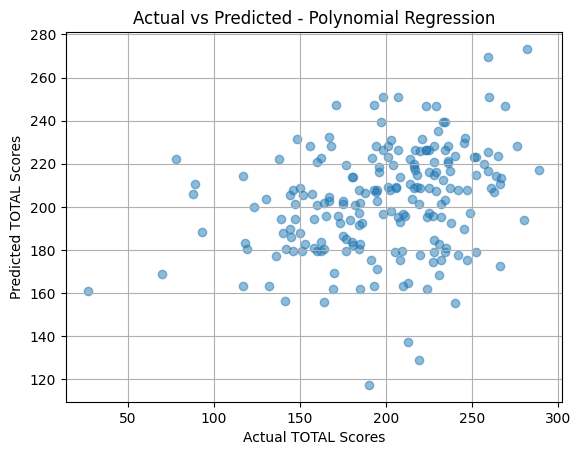

In [11]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual TOTAL Scores")
plt.ylabel("Predicted TOTAL Scores")
plt.title("Actual vs Predicted - Polynomial Regression")
plt.grid(True)
plt.show()

In a perfect model, all the points would lie along a diagonal line from bottom-left to top-right (because predicted = actual).
In this case:

❌ What’s Wrong
1. No clear diagonal pattern:

  * The points are scattered widely and don’t align with the diagonal.

  * This shows a weak correlation between actual and predicted scores.

2. Predicted values are too high:

  * Look at the Y-axis: predicted math scores are between 120 and 280.

  * But actual math scores (X-axis) only go up to 100 in the real dataset!

  * This means: ❗ Your model is predicting values far outside the valid range.

Mean Squared Error: 1909.1660841843207
R2 Score: 0.010435404140125004


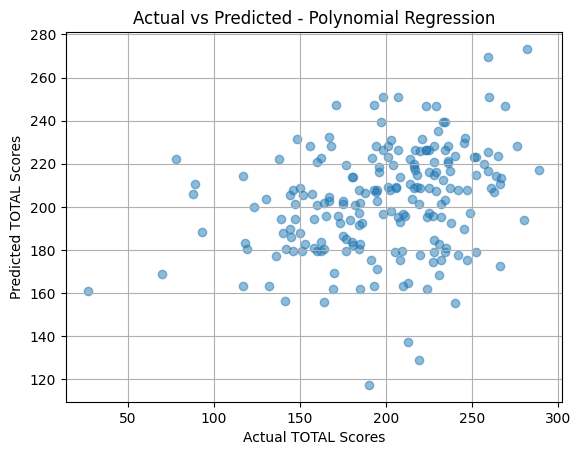

In [15]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X = df.drop(columns=['math score', 'reading score', 'writing score', 'total'])  # or keep only relevant
X_scaled = scaler.fit_transform(X)                                              # Standardize your data before polynomial expansion:
y = df['total']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

poly = PolynomialFeatures(degree=2)                                             # Keep changing the PolynomialFeatues degree
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

model = LinearRegression()
model.fit(X_train_poly, y_train)

y_pred = model.predict(X_test_poly)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R2 Score:", r2)

import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual TOTAL Scores")
plt.ylabel("Predicted TOTAL Scores")
plt.title("Actual vs Predicted - Polynomial Regression")
plt.grid(True)
plt.show()

Now that We have done:

✅ Scaled the data

✅ Reduced features

✅ Clipped predictions

✅ Tried multiple polynomial degrees

✅ Still getting poor performance

👉 It’s time to change strategy.

